# Example of the aitlas toolbox in the context of object detection in remote sensing images

## Import the required packages

In [ ]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning) 
warnings.filterwarnings("ignore", category=DeprecationWarning) 

from aitlas.datasets import ObjectDetectionStraightParallaxDataset 
from aitlas.transforms import Resize
from aitlas.utils import image_loader
from aitlas.models import FasterRCNN

## Visualize images and objects witn bounding boxes

Total number of patches: 1764


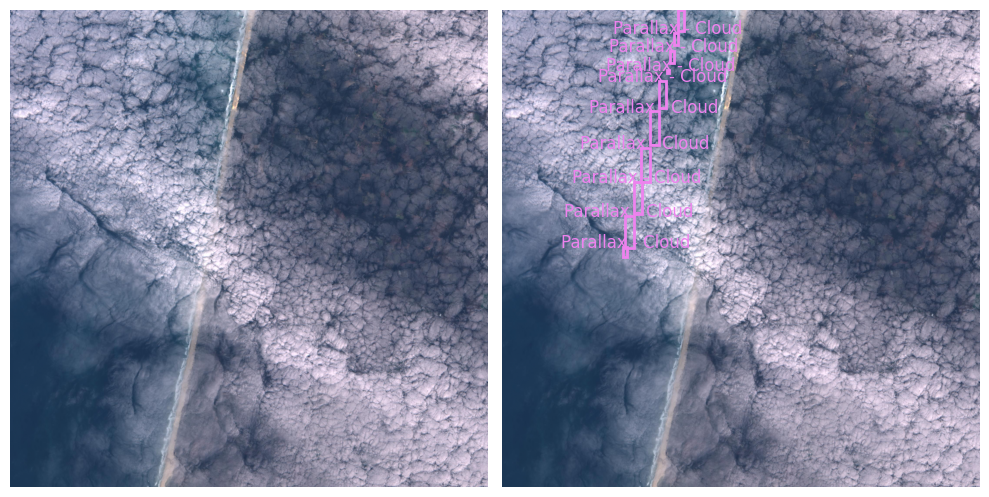

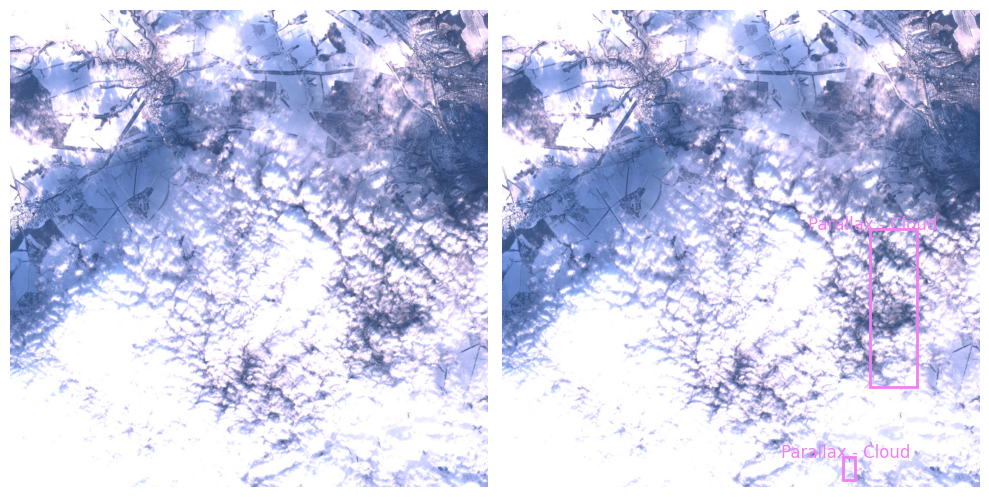

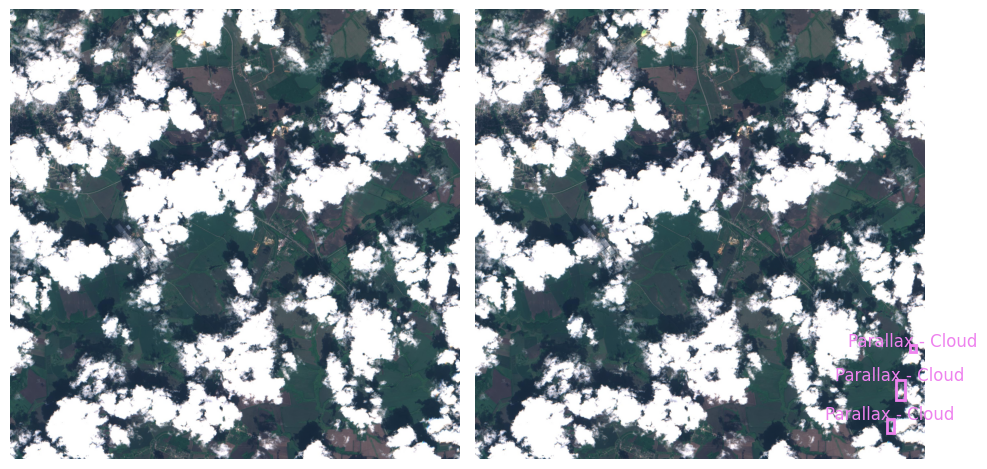

In [10]:
dataset_config = {
    "data_dir": "/home/dragik/data/parallax/TCI_jpg/",
    "annotation_dir": "/home/dragik/data/parallax/Parallax_COCO_straight/",
}
dataset = ObjectDetectionStraightParallaxDataset(dataset_config)

print(f"Total number of patches: {len(dataset)}")
dataset.show_image(1000);
dataset.show_image(250);
dataset.show_image(100);

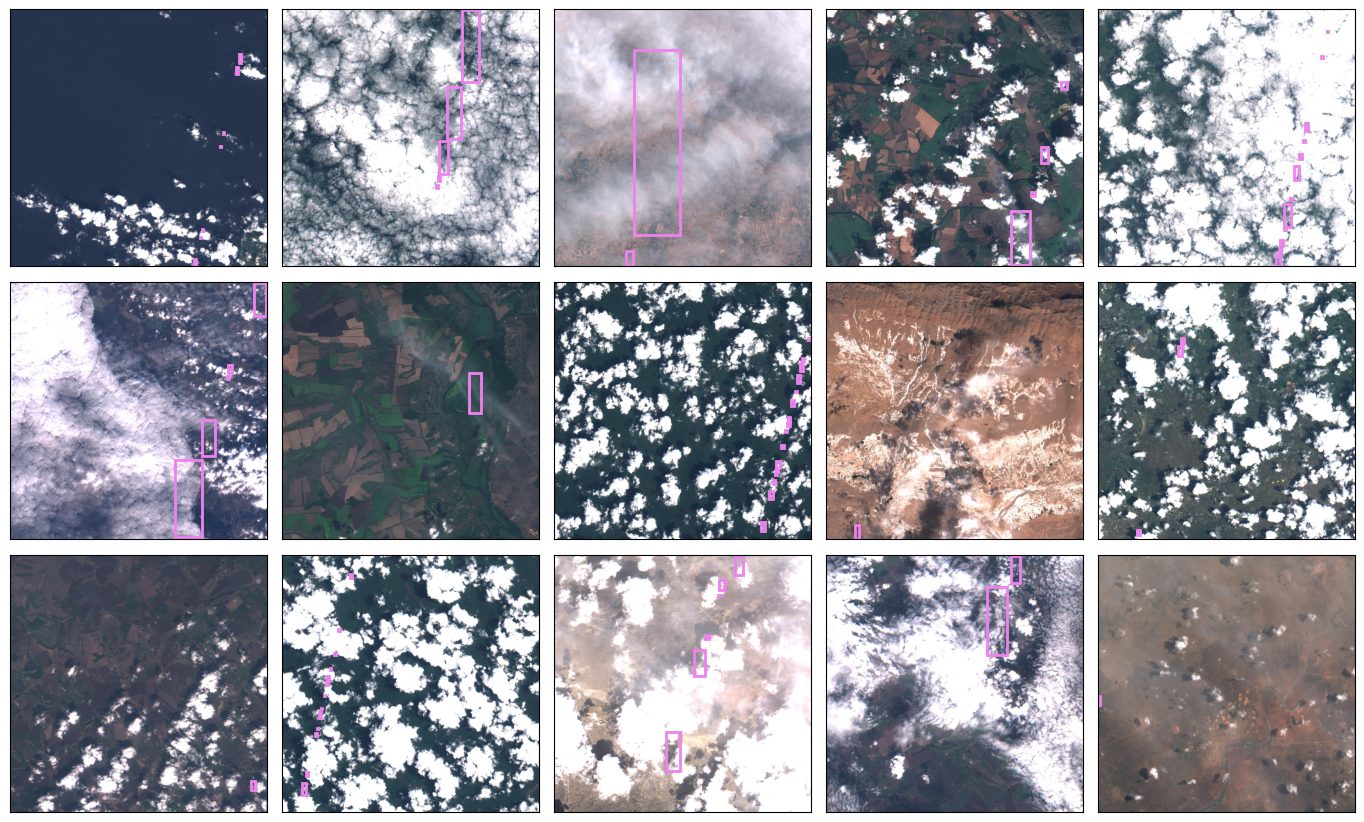

In [6]:
dataset.show_batch(15);

In [11]:
dataset.data_distribution_table()

Label  Count
0     Parallax - Cloud   9529
1      Parallax - Land    245
2        Other Anomaly      4
3  Missing Data - Land      2

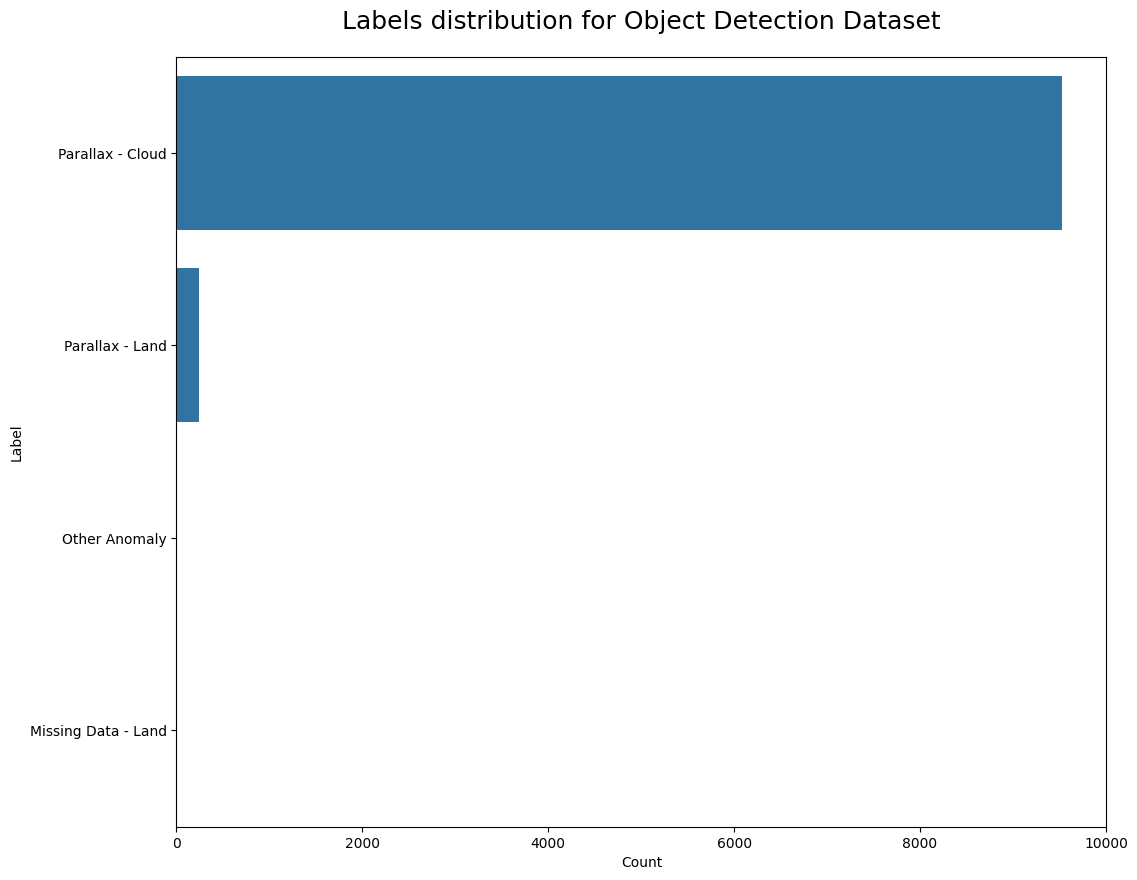

In [12]:
dataset.data_distribution_barchart();

## Load training data

In [17]:
train_dataset_config = {
    "batch_size": 4,
    "shuffle": True,
    "data_dir": "/home/dragik/data/parallax/training/images/",
    "annotation_dir": "/home/dragik/data/parallax/training/labels/straight_bboxes/",
    "joint_transforms": ["aitlas.transforms.ResizeToTensorV2"]
}
train_dataset = ObjectDetectionStraightParallaxDataset(train_dataset_config)

print(f"Total number of train images: {len(train_dataset)}")

Total number of train images: 1412


## Create the model

In [18]:
epochs = 5
model_directory = "/home/dragik/data/parallax/experiments/coco_straight_bboxes/"
model_config = {
    "num_classes": 4,
    "learning_rate": 0.0001,
    "pretrained": True,
    "metrics": ["map"]
}

model = FasterRCNN(model_config)
model.prepare()

## Start the training

In [19]:
model.train_model(
    train_dataset=train_dataset,
    epochs=epochs,
    model_directory=model_directory,
    run_id='1'
);

2024-10-08 13:33:47,153 INFO Starting training.
training: 100%|█████████████████████████████████████████████████████████████| 353/353 [01:02<00:00,  5.64it/s]
2024-10-08 13:34:49,792 INFO epoch: 1, time: 62, loss:  0.89341
testing on train set: 100%|█████████████████████████████████████████████████| 353/353 [00:31<00:00, 11.30it/s]
2024-10-08 13:35:22,969 INFO map:0.0, map_50:0.0, map_75:0.0, map_small:0.0, map_medium:0.0, map_large:0.0, mar_1:0.0, mar_10:0.0, mar_100:0.0, mar_small:0.0, mar_medium:0.0, mar_large:0.0, map_per_class:tensor(0.), tensor(0.), tensor(0.), tensor(0.), mar_100_per_class:tensor(0.), tensor(0.), tensor(0.), tensor(0.), classes:tensor(0, dtype=torch.int32), tensor(1, dtype=torch.int32), tensor(2, dtype=torch.int32), tensor(3, dtype=torch.int32)
training: 100%|█████████████████████████████████████████████████████████████| 353/353 [01:03<00:00,  5.58it/s]
2024-10-08 13:36:26,223 INFO epoch: 2, time: 64, loss:  0.67549
testing on train set: 100%|███████████████████

## Evaluate the model

In [20]:
test_dataset_config = {
    "batch_size": 8,
    "shuffle": False,
    "data_dir": "/home/dragik/data/parallax/testing/images/",
    "annotation_dir": "/home/dragik/data/parallax/testing/labels/straight_bboxes/",
    "joint_transforms": ["aitlas.transforms.ResizeToTensorV2"]
}

test_dataset = ObjectDetectionStraightParallaxDataset(test_dataset_config)
print(f"Total number of test images: {len(test_dataset)}")

model = FasterRCNN(model_config)
model.prepare()
model.running_metrics.reset()
model_path = "/home/dragik/data/parallax/experiments/coco_straight_bboxes/checkpoint.pth.tar"
model.evaluate(dataset=test_dataset, model_path=model_path)
model.running_metrics.get_scores(model.metrics)

Total number of test images: 352


2024-10-08 13:42:18,791 INFO Loading checkpoint /home/dragik/data/parallax/experiments/coco_straight_bboxes/checkpoint.pth.tar
2024-10-08 13:42:19,670 INFO Loaded checkpoint /home/dragik/data/parallax/experiments/coco_straight_bboxes/checkpoint.pth.tar at epoch 6
testing on test set: 100%|████████████████████████████████████████████████████| 44/44 [00:08<00:00,  5.17it/s]


[{'map': 0.0,
  'map_50': 0.0,
  'map_75': 0.0,
  'map_small': 0.0,
  'map_medium': 0.0,
  'map_large': 0.0,
  'mar_1': 0.0,
  'mar_10': 0.0,
  'mar_100': 0.0,
  'mar_small': 0.0,
  'mar_medium': 0.0,
  'mar_large': 0.0,
  'map_per_class': [tensor(0.), tensor(0.), tensor(0.), tensor(0.)],
  'mar_100_per_class': [tensor(0.), tensor(0.), tensor(0.), tensor(0.)],
  'classes': [tensor(0, dtype=torch.int32),
   tensor(1, dtype=torch.int32),
   tensor(2, dtype=torch.int32),
   tensor(3, dtype=torch.int32)]}]

## Predictions

2024-10-08 13:42:35,174 INFO Loading checkpoint /home/dragik/data/parallax/experiments/coco_straight_bboxes/checkpoint.pth.tar
2024-10-08 13:42:35,522 INFO Loaded checkpoint /home/dragik/data/parallax/experiments/coco_straight_bboxes/checkpoint.pth.tar at epoch 6


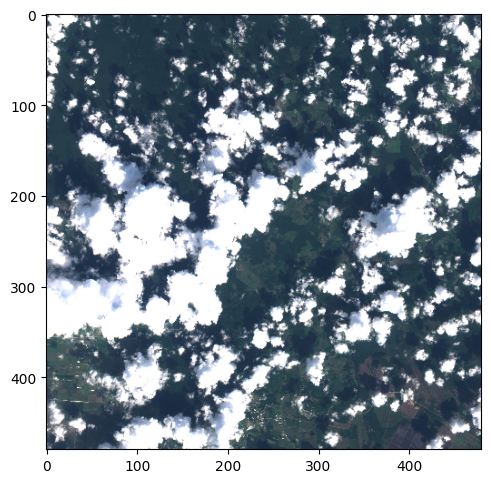

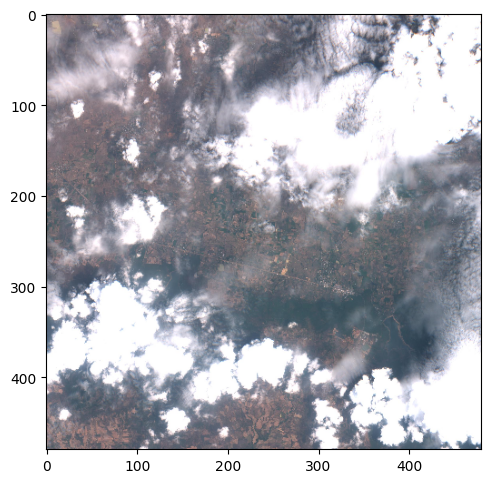

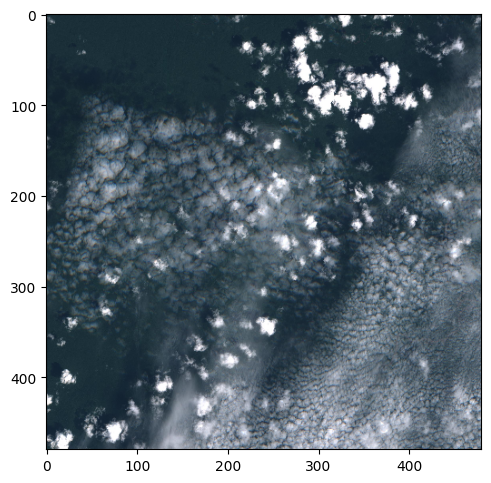

In [21]:
model_config = {
    "num_classes": 4,
    "learning_rate": 0.0001,
    "pretrained": True,
    "metrics": ["map"]
}
model = FasterRCNN(model_config)
model.prepare()

model_path = "/home/dragik/data/parallax/experiments/coco_straight_bboxes/checkpoint.pth.tar"
labels = ['Parallax - Cloud', 'Parallax - Land', 'Other Anomaly', 'Missing Data - Land']
transform = Resize()
model.load_model(model_path)

image = image_loader('/home/dragik/data/parallax/testing/images/S2A_MSIL1C_20190105T162651_N0207_R040_T16QBE_20190105T182208_1_5.jpg')
fig = model.detect_objects(image, labels, transform)

image = image_loader('/home/dragik/data/parallax/testing/images/S2A_MSIL1C_20190404T033001_N0207_R018_T48PUB_20190404T103027_5_3.jpg')
fig = model.detect_objects(image, labels, transform)

image = image_loader('/home/dragik/data/parallax/testing/images/S2A_MSIL1C_20230111T144721_N0509_R139_T19MHQ_20230111T180814_2_3.jpg')
fig = model.detect_objects(image, labels, transform)